<a href="https://colab.research.google.com/github/Kovidk/DS-Unsupervised-ML-Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis

##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -Kovid Krishnan**
##### **Team Member 2 - NA**
##### **Team Member 3 - NA**
##### **Team Member 4 - NA**

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **GitHub Link -**

***Repository Link***:- https://github.com/Kovidk/DS-Unsupervised-ML-Zomato-Restaurant-Clustering-and-Sentiment-Analysis

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

## **Importing Libraries**

In [ ]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing Dataset From Drive**

In [ ]:
meta_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort London/Project/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort London/Project/Zomato Restaurant reviews.csv')

# **1. Meta Data**

In [ ]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
meta_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
meta_df.shape

(105, 6)

We have 106 rows and 6 columns.

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
meta_df_1= meta_df.copy()

We have some Null values in Collections and 1 null in Timings.

### Let's Drop Unnecessary Columns.

In [ ]:
#dropping unneccesary column
meta_df_1 = meta_df_1.drop(['Links', 'Timings'],axis = 1)
meta_df_1.head()

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


### Now let's handle Null Values.

In [ ]:
meta_df_1.isnull().sum()

Name            0
Cost            0
Collections    54
Cuisines        0
dtype: int64

54 Null values in Collections.

In [ ]:
# replacing nan values
meta_df_1['Collections'] = meta_df_1['Collections'].replace(np.nan , "Unknown", regex=True)

In [ ]:
meta_df_1.isnull().sum()

Name           0
Cost           0
Collections    0
Cuisines       0
dtype: int64

We have removed all null values.

In [ ]:
meta_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    object
 2   Collections  105 non-null    object
 3   Cuisines     105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


Here we can see our Cost Column is of type Object let's check it.

In [ ]:
meta_df_1.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [ ]:
# changing the data type of the cost function
meta_df_1['Cost'] = meta_df_1['Cost'].str.replace(",","").astype('int64')

In [ ]:
meta_df_1['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [ ]:
meta_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    int64 
 2   Collections  105 non-null    object
 3   Cuisines     105 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.4+ KB


We have converted Cost column to integer.

### **EDA**

### Top 10 Most Expensive Restruant.

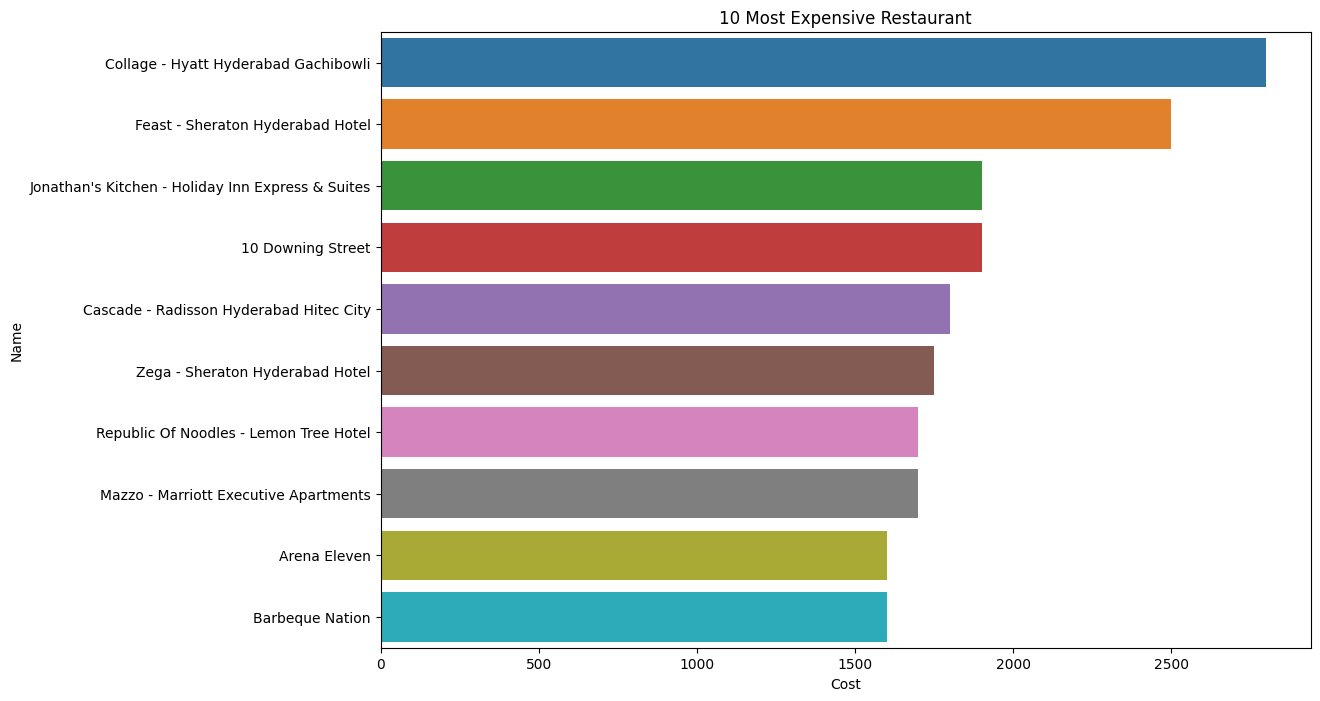

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x='Cost', y='Name', data=meta_df_1.sort_values(ascending=False, by='Cost')[:10] )
plt.title('10 Most Expensive Restaurant')
plt.show()

### Top 10 Cheapest Resturants.

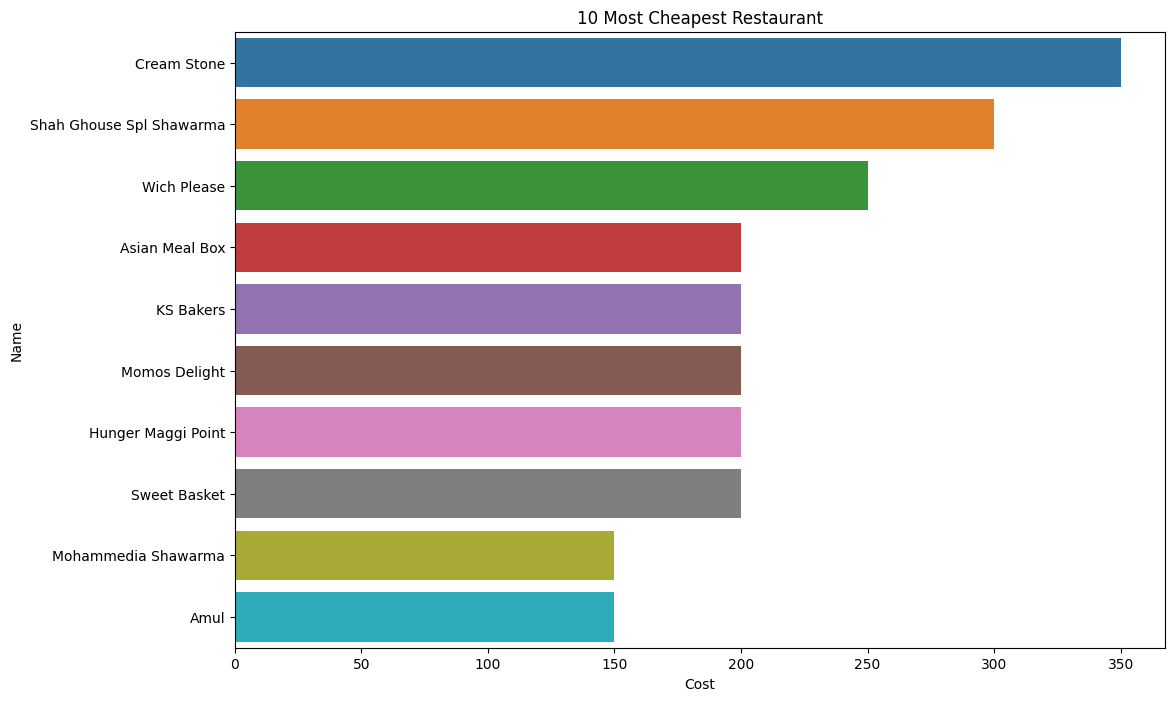

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x='Cost', y='Name', data=meta_df_1.sort_values(ascending=False, by='Cost')[-10:] )
plt.title('10 Most Cheapest Restaurant')
plt.show()

### Most Popular Cuisines.

In [ ]:
meta_df_1.head()

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


In [ ]:
# For loops to extract every single Cuisine name.
cuisine_list = meta_df_1.Cuisines.str.split(', ')
cuisine_ = []
for names in cuisine_list:
  for name in names:
    cuisine_.append(name)


In [ ]:
cuisine_df = pd.DataFrame(cuisine_, columns=['Cuisines']).value_counts().reset_index(name='Count')
cuisine_df.head()

,Cuisines,Count
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Asian,15


In [ ]:
cuisine_df.shape

(44, 2)

Text(0.5, 1.0, 'Most popular cuisines at Restaurants')

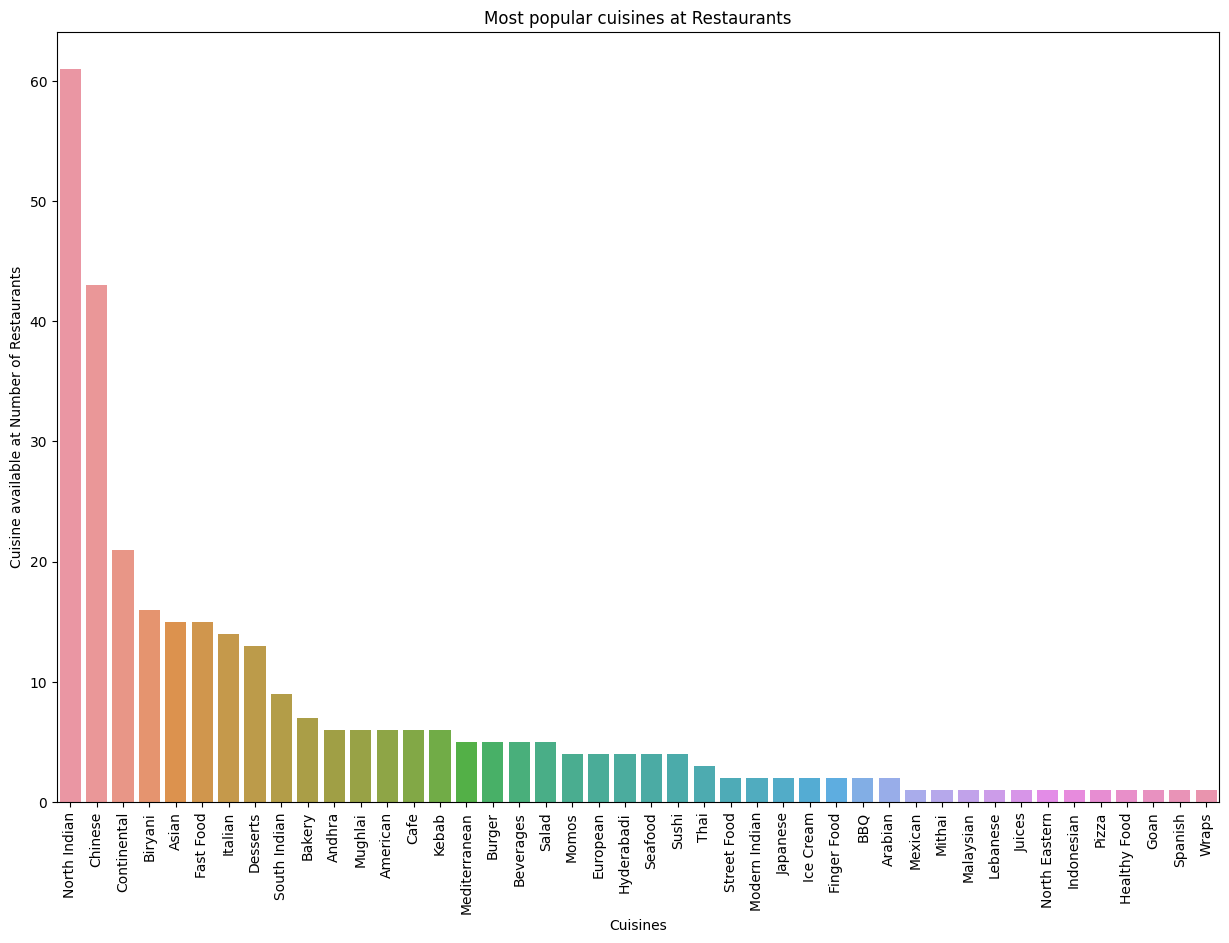

In [ ]:
# Plot of Cuisines in Resturants.
plt.figure(figsize=[15,10])
sns.barplot(data=cuisine_df, x='Cuisines', y= 'Count')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants')
plt.title('Most popular cuisines at Restaurants')

Observation:

1.   North Indian, Chinese, Continental are the Most popular Cuisine available at most  Resturants.
2.   Goan, Spanish, Wraps are the least popular Cuisines.



### Top Collections.

In [ ]:
collections = meta_df_1['Collections'].value_counts().reset_index()
collections.head()

,index,Collections
0,Unknown,54
1,Food Hygiene Rated Restaurants in Hyderabad,4
2,Great Buffets,2
3,New on Gold,2
4,Hyderabad's Hottest,2


In [ ]:
collections.rename(columns={ 'index': 'Collection','Collections': 'Count' }, inplace=True)
collections.head()

,Collection,Count
0,Unknown,54
1,Food Hygiene Rated Restaurants in Hyderabad,4
2,Great Buffets,2
3,New on Gold,2
4,Hyderabad's Hottest,2


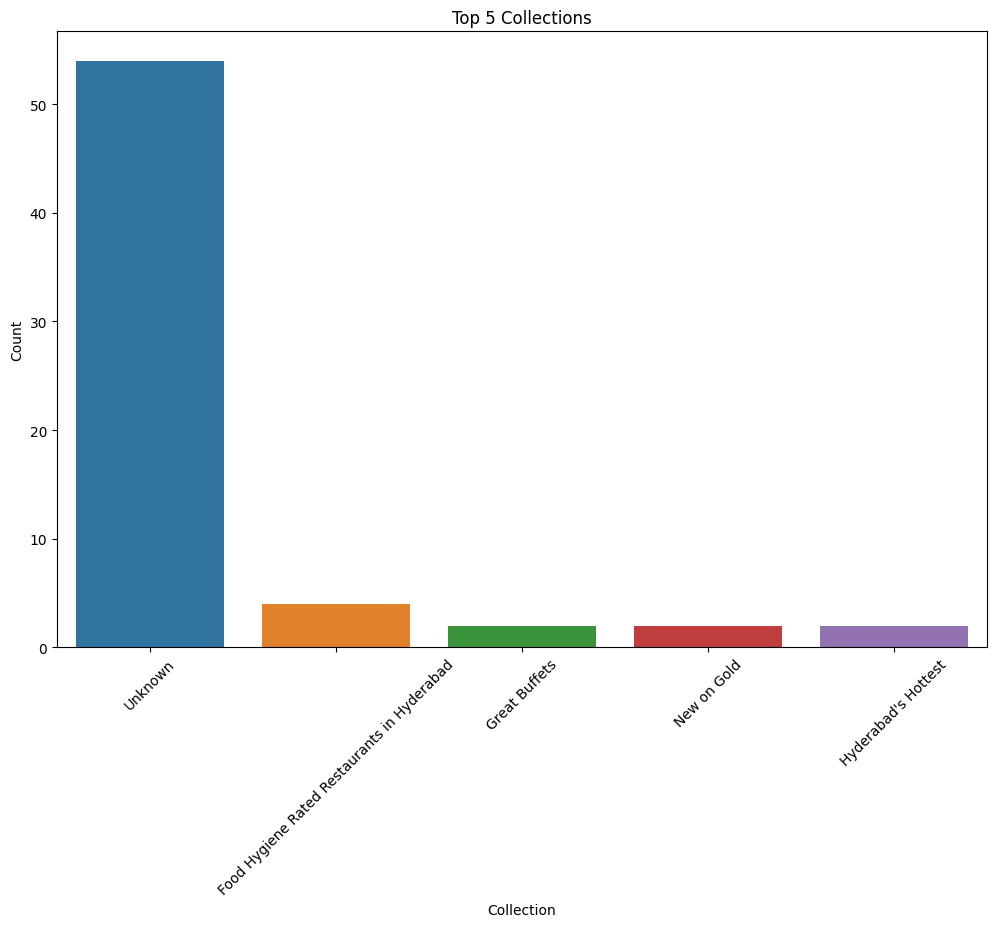

In [ ]:
# Top 5 collections
plt.figure(figsize = (12,8))
sns.barplot(x='Collection', y='Count', data=collections.sort_values(ascending=False, by='Count')[:5] )
plt.xticks(rotation = 45)
plt.title('Top 5 Collections')
plt.show()

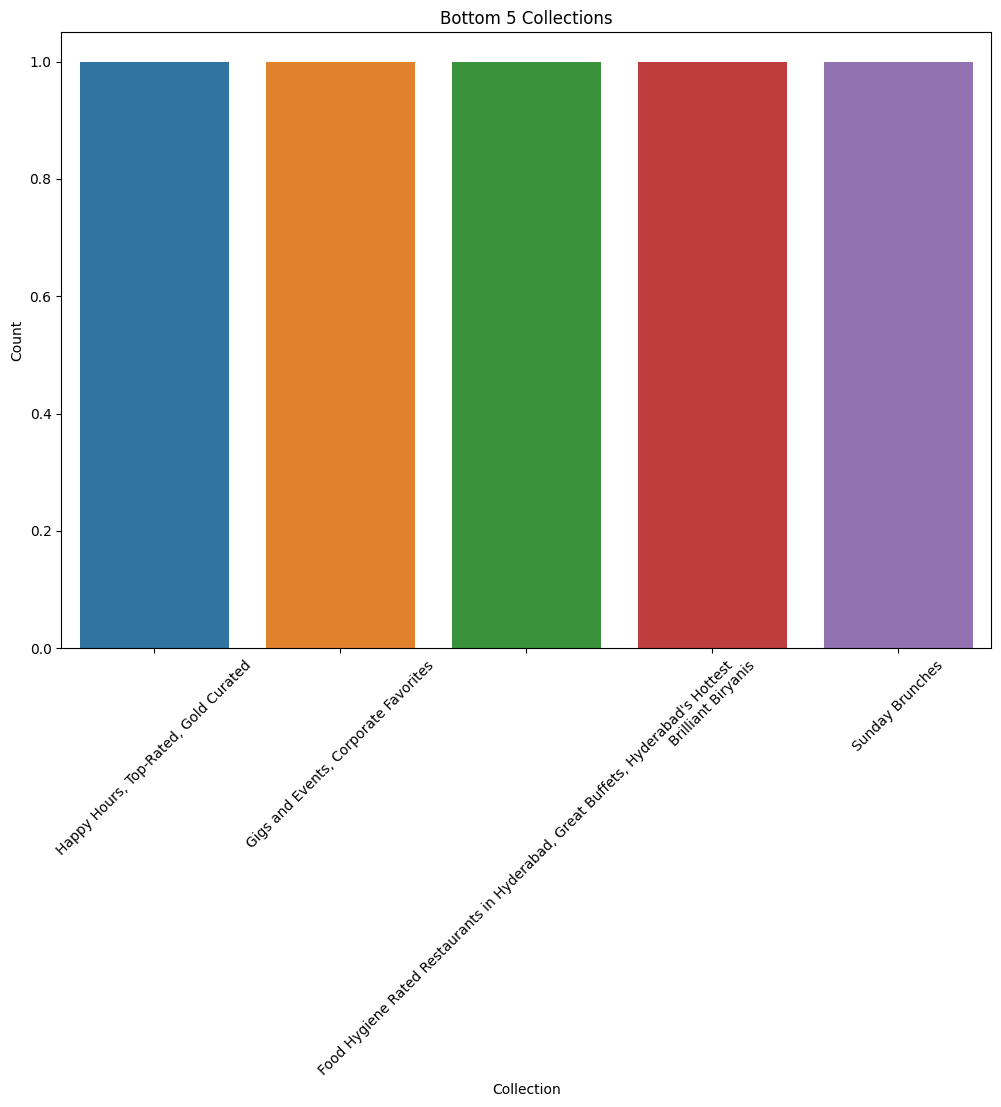

In [ ]:
# Bottom 5 collections
plt.figure(figsize = (12,8))
sns.barplot(x='Collection', y='Count', data=collections.sort_values(ascending=False, by='Count')[-5:])
plt.xticks(rotation=45)
plt.title('Bottom 5 Collections')
plt.show()

# **Clustering on  Meta Data**



In [ ]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
clustering_df= meta_df.copy()

In [ ]:
clustering_df.drop(['Links'],axis = 1 ,inplace = True)

In [ ]:
clustering_df

,Name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...
100,IndiBlaze,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [ ]:
clustering_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [ ]:
# changing the data type of the cost function
clustering_df['Cost'] = clustering_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
clustering_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

<!-- [-p̂t;.5.PL### Merging the two dataframes SO that we can add the average ratings of the restaurants also. -->

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
review_df = reviews_df.copy()

In [ ]:
review_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [ ]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)

There is one Rating in str which is Like lets replace it with 4.

In [ ]:
review_df['Rating'] = review_df['Rating'].replace('Like', '4')

In [ ]:
# Changing data type of rating column to float.
review_df['Rating']= review_df['Rating'].astype('float')

Creating a new df to get the average ratings for each Restaurant.

In [ ]:
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

In [ ]:
ratings_df .sort_values(by='Rating',ascending = False).head(10)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
87,The Indi Grill,4.60
97,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


In [ ]:
df_cluster = clustering_df.merge(ratings_df, left_on='Name',right_on='Restaurant')
df_cluster

,Name,Cost,Collections,Cuisines,Timings,Restaurant,Rating
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,4.280
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Paradise,4.700
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",Flechazo,4.660
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,Shah Ghouse Hotel & Restaurant,3.210
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",Over The Moon Brew Company,4.340
...,...,...,...,...,...,...,...
95,Desi Bytes,400,NaN,"North Indian, Chinese","1 PM to 2 AM (Mon, Wed-Sun), Tue Closed",Desi Bytes,2.900
96,Hyderabadi Daawat,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",12:30pm to 11:30pm (Mon-Sun),Hyderabadi Daawat,3.830
97,Zega - Sheraton Hyderabad Hotel,1750,NaN,"Asian, Sushi",12Noon to 2AM (Mon-Sun),Zega - Sheraton Hyderabad Hotel,4.450
98,Triptify,400,NaN,North Indian,11 AM to 11 PM,Triptify,3.550


In [ ]:
df_cluster.Rating.isnull().sum()

0

In [ ]:
df_cluster=df_cluster.loc[:,['Name','Cost','Cuisines','Rating']]
df_cluster['Cuisines'] = df_cluster['Cuisines'].apply(lambda x : x.lower())
df_cluster.head()

,Name,Cost,Cuisines,Rating
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
1,Paradise,800,"biryani, north indian, chinese",4.70
2,Flechazo,1300,"asian, mediterranean, north indian, desserts",4.66
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...",3.21
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...",4.34


### Lets Create a set of Cuisines for Our Clustering Model.

In [ ]:
# Creating a function for splitting our Cuisines and storing in list.
def cuisine_list(cuisines):


   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
# Applying our function on Cuisine column.
df_cluster['cuisine']=df_cluster['Cuisines'].apply(lambda x:cuisine_list(x))

In [ ]:
df_cluster.head()

,Name,Cost,Cuisines,Rating,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,"[chinese, south indian, european, kebab, north..."
1,Paradise,800,"biryani, north indian, chinese",4.70,"[chinese, north indian, biryani]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts",4.66,"[north indian, mediterranean, asian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...",3.21,"[chinese, biryani, seafood, beverages, north i..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...",4.34,"[chinese, mediterranean, asian, north indian, ..."


In [ ]:
# Exploding Cuisine for getting seperate cuisine for each Resturants.
df_cluster=df_cluster.explode('cuisine')
df_cluster.head()

,Name,Cost,Cuisines,Rating,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,south indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,european
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,north indian


In [ ]:
df_cluster['cuisine']

0          chinese
0     south indian
0         european
0            kebab
0     north indian
          ...     
97           sushi
97           asian
98    north indian
99         chinese
99         seafood
Name: cuisine, Length: 301, dtype: object

In [ ]:
df_cluster.reset_index(inplace=True)

### Bringing all the cuisines into their respective sets of spicy food, Healthy food, Fast Food and Dessert.

In [ ]:
df_cluster.cuisine.unique()

array(['chinese', 'south indian', 'european', 'kebab', 'north indian',
       'continental', 'biryani', 'mediterranean', 'asian', 'desserts',
       'seafood', 'beverages', 'goan', 'healthy food', 'lebanese',
       'american', 'ice cream', 'street food', 'fast food', 'bbq',
       'finger food', 'italian', 'burger', 'salad', 'sushi', 'japanese',
       'mexican', 'mughlai', 'andhra', 'bakery', 'juices', 'arabian',
       'hyderabadi', 'cafe', 'spanish', 'wraps', 'indonesian', 'thai',
       'modern indian', 'momos', 'pizza', 'north eastern'], dtype=object)

In [ ]:
cuisine_set=[]
for i in df_cluster['cuisine']:
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    cuisine_set.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    cuisine_set.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    cuisine_set.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    cuisine_set.append('Dessert')

In [ ]:
cuisine_sets=pd.DataFrame(cuisine_set)
cuisine_sets.columns=['cuisine']
cuisine_sets

,cuisine
0,fast food
1,Healthy food
2,Healthy food
3,spicy food
4,spicy food
...,...
296,fast food
297,spicy food
298,spicy food
299,fast food


In [ ]:
cuisine_sets.value_counts()

cuisine     
spicy food      131
fast food        81
Healthy food     62
Dessert          27
dtype: int64

In [ ]:
df_cluster.drop(['cuisine'],axis=1,inplace=True)

In [ ]:
df_cluster.head()

,index,Name,Cost,Cuisines,Rating
0,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
1,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
2,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
3,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
4,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28


In [ ]:
cluster_dataset=pd.concat([df_cluster,cuisine_sets],axis=1)
cluster_dataset.drop(['index'],axis=1,inplace=True)

In [ ]:
cluster_dataset

,Name,Cost,Cuisines,Rating,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,fast food
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,Healthy food
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,Healthy food
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,spicy food
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,spicy food
...,...,...,...,...,...
296,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.450,fast food
297,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.450,spicy food
298,Triptify,400,north indian,3.550,spicy food
299,Chinese Pavilion,1000,"chinese, seafood",3.745,fast food


### Now Lets Make Dummies of cuisine set. ( One Hot Encoding )

In [ ]:
# converting str to vectors using get-dummies.
cluster_dataset = pd.get_dummies(cluster_dataset, columns=["cuisine"],prefix=None)
cluster_dataset

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,0,1,0
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,1,0,0
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,1,0,0
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,0,0,1
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,0,0,1
...,...,...,...,...,...,...,...,...
296,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.450,0,0,1,0
297,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.450,0,0,0,1
298,Triptify,400,north indian,3.550,0,0,0,1
299,Chinese Pavilion,1000,"chinese, seafood",3.745,0,0,1,0


Now lets Implode our dataset using Groupby Method.

In [ ]:
cluster_dataset=cluster_dataset.groupby(['Name','Cost','Cuisines','Rating'])[['cuisine_Dessert','cuisine_Healthy food','cuisine_fast food','cuisine_spicy food']].sum().reset_index()

In [ ]:
cluster_dataset

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,10 Downing Street,1900,"north indian, chinese, continental",3.80,0,0,1,2
1,13 Dhaba,450,north indian,3.48,0,0,0,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",4.76,0,2,0,1
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",4.88,0,2,0,1
4,Absolute Sizzlers,750,"continental, american, chinese",3.62,0,1,1,1
...,...,...,...,...,...,...,...,...
95,Urban Asia - Kitchen & Bar,1100,"asian, thai, chinese, sushi, momos",3.65,0,1,3,1
96,Yum Yum Tree - The Arabian Food Court,1200,"north indian, hyderabadi",3.56,0,0,0,2
97,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.45,0,0,1,1
98,Zing's Northeast Kitchen,550,"north eastern, momos",3.65,0,1,1,0


We have successfully implode our dataset we are back to 100 rows.

In [ ]:
#Now lets drop the Unnecessary columns for our model.
cluster_data= cluster_dataset.drop(['Name','Cuisines'],axis=1)

In [ ]:
cluster_data

,Cost,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,1900,3.80,0,0,1,2
1,450,3.48,0,0,0,1
2,1100,4.76,0,2,0,1
3,1500,4.88,0,2,0,1
4,750,3.62,0,1,1,1
...,...,...,...,...,...,...
95,1100,3.65,0,1,3,1
96,1200,3.56,0,0,0,2
97,1750,4.45,0,0,1,1
98,550,3.65,0,1,1,0


In [ ]:
X=cluster_data

## **Finding Optimal Number of Clusters**

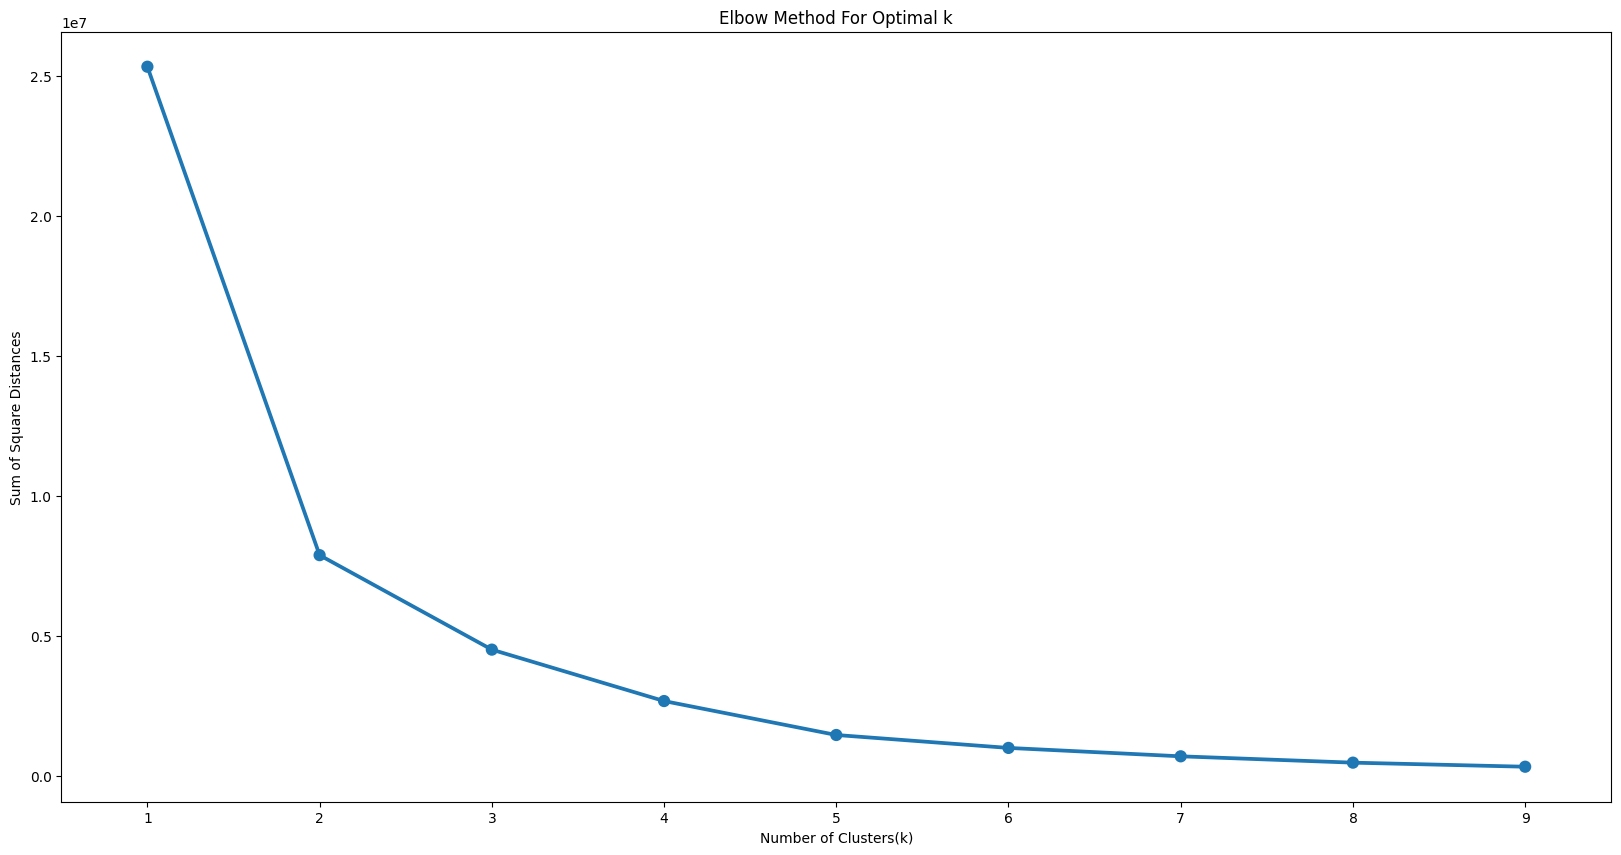

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg =[]
 # Calculate average silhouette score for each number of clusters (2 to 10)

for k in range(2,10):
  km = KMeans(n_clusters=k, random_state=1)
  km.fit(X)
  silhouette_avg.append(silhouette_score(X, km.labels_))

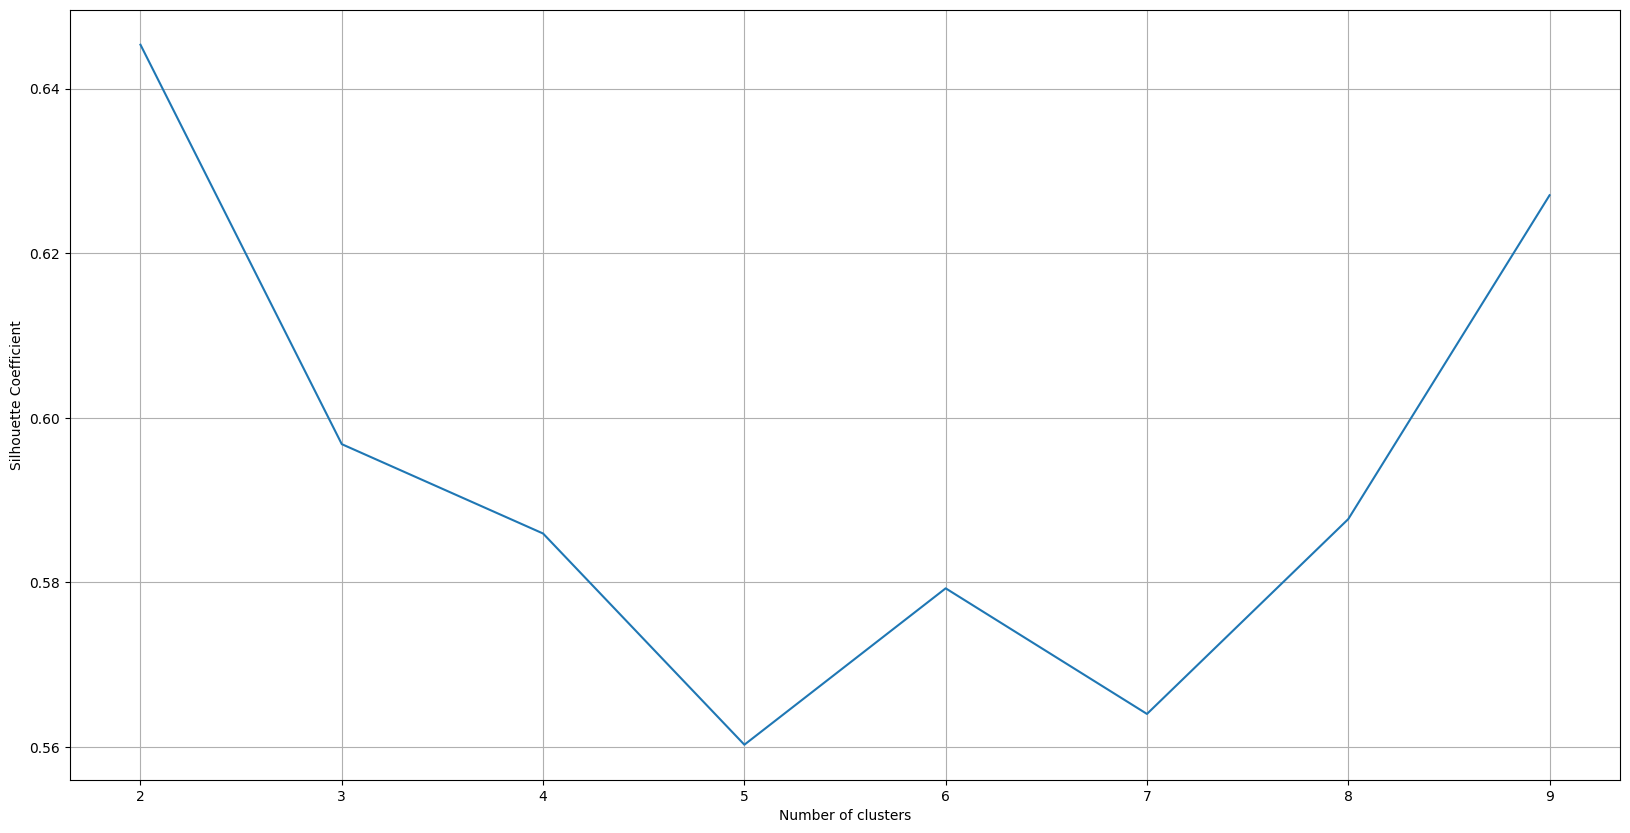

In [ ]:
# plot the results
plt.plot(range(2,10), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

We can see from above two plots the Optimal number of Clusters is 5 .

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(random_state=11, n_clusters=5)
model.fit(X)

KMeans(n_clusters=5, random_state=11)

In [ ]:
cluster_labels = model.predict(X)

In [ ]:
cluster_dataset['labels'] = cluster_labels
cluster_dataset.head(10)

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food,labels
0,10 Downing Street,1900,"north indian, chinese, continental",3.800000,0,0,1,2,1
1,13 Dhaba,450,north indian,3.480000,0,0,0,1,0
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",4.760000,0,2,0,1,4
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",4.880000,0,2,0,1,1
4,Absolute Sizzlers,750,"continental, american, chinese",3.620000,0,1,1,1,2
5,Al Saba Restaurant,750,"north indian, chinese, seafood, biryani, hyder...",3.155000,0,1,1,3,2
6,American Wild Wings,600,"american, fast food, salad, burger",3.974026,0,2,2,0,2
7,Amul,150,"ice cream, desserts",3.940000,2,0,0,0,0
8,Arena Eleven,1600,continental,4.117647,0,0,0,1,1
9,Aromas@11SIX,750,"north indian, chinese, mughlai, biryani",3.460000,0,0,1,3,2


Text(0.5, 0, 'Cost')

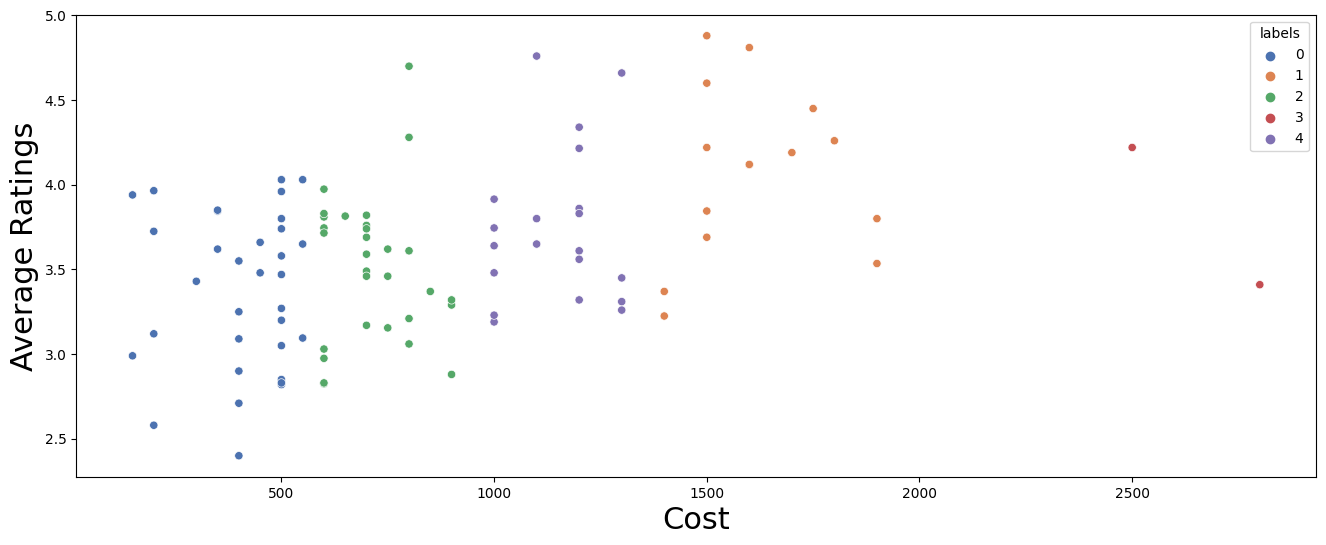

In [ ]:
plt.figure(figsize = (16,6))
sns.scatterplot(y='Rating',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

We can See from above scatter plot Resturant are clustered well on cost and ratings.

Text(0.5, 0, 'Cost')

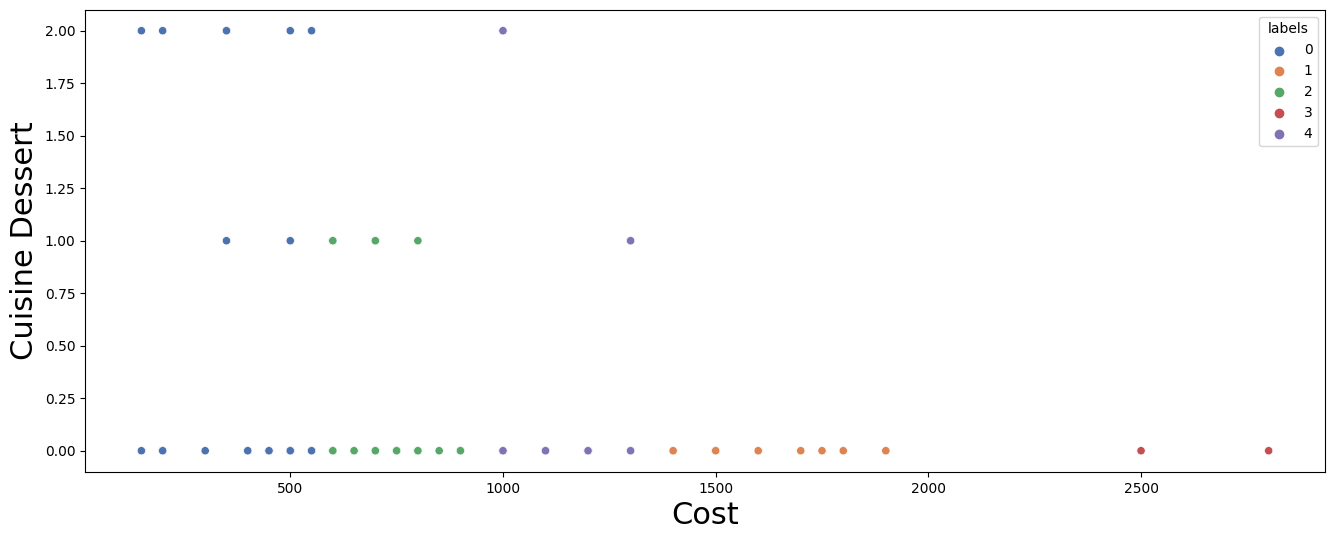

In [ ]:
plt.figure(figsize = (16,6))
sns.scatterplot(y='cuisine_Dessert',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine Dessert',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

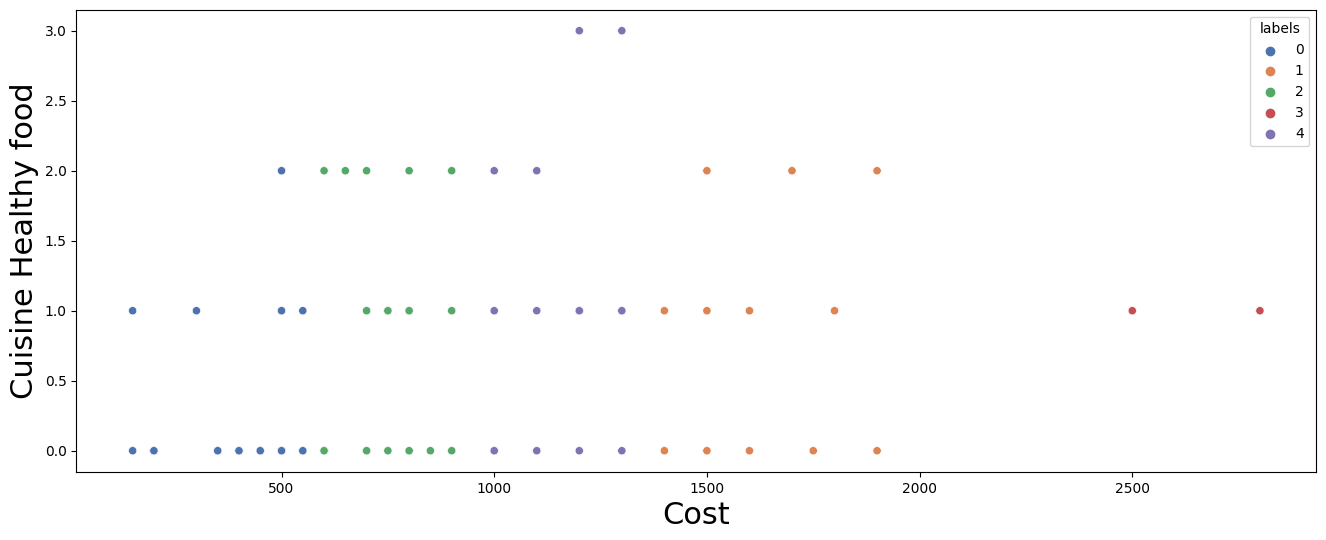

In [ ]:
plt.figure(figsize = (16,6))
sns.scatterplot(y='cuisine_Healthy food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine Healthy food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

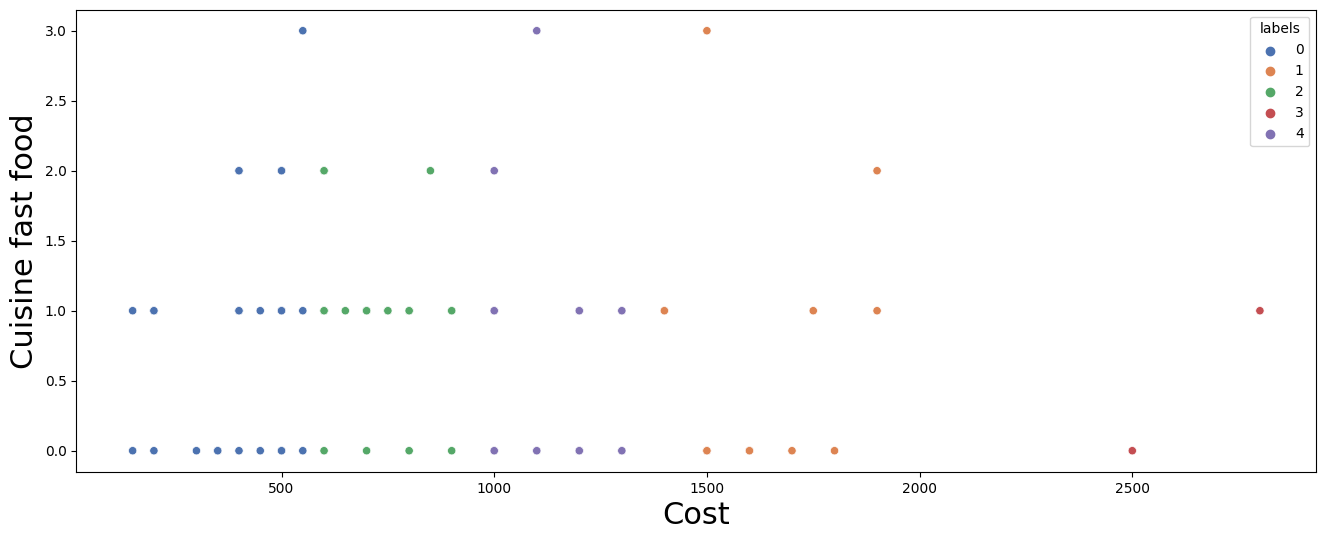

In [ ]:
plt.figure(figsize = (16,6))
sns.scatterplot(y='cuisine_fast food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine fast food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

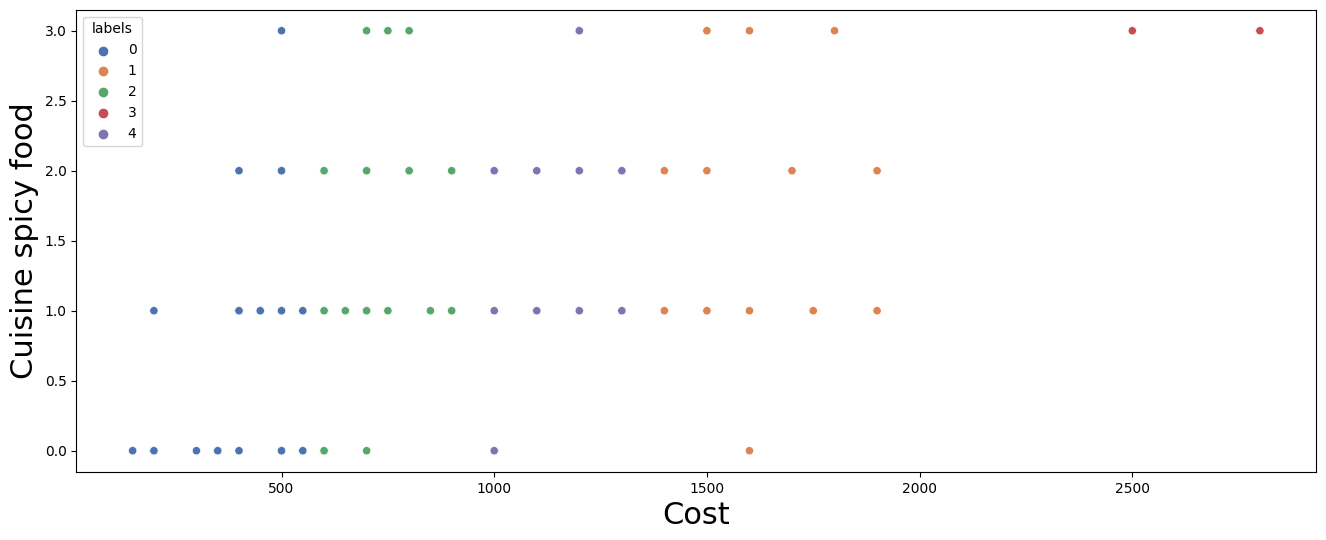

In [ ]:
plt.figure(figsize = (16,6))
sns.scatterplot(y='cuisine_spicy food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine spicy food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

### **Name of Restaurants, Ratings in Different Clusters**

In [ ]:
cluster_1 = cluster_dataset.loc[cluster_dataset['labels']==0]
cluster_1[['Name','Rating','labels']].head()

,Name,Rating,labels
1,13 Dhaba,3.48,0
7,Amul,3.94,0
10,Asian Meal Box,2.58,0
15,Being Hungry,3.66,0
17,Biryanis And More,3.74,0


In [ ]:
cluster_2 = cluster_dataset.loc[cluster_dataset['labels']==1]
cluster_2[['Name','Rating','labels']].head()

,Name,Rating,labels
0,10 Downing Street,3.800000,1
3,AB's - Absolute Barbecues,4.880000,1
8,Arena Eleven,4.117647,1
11,B-Dubs,4.810000,1
13,Barbeque Nation,4.120000,1


In [ ]:
cluster_3 = cluster_dataset.loc[cluster_dataset['labels']==2]
cluster_3[['Name','Rating','labels']].head()

,Name,Rating,labels
4,Absolute Sizzlers,3.620000,2
5,Al Saba Restaurant,3.155000,2
6,American Wild Wings,3.974026,2
9,Aromas@11SIX,3.460000,2
12,Banana Leaf Multicuisine Restaurant,3.690000,2


In [ ]:
cluster_4 = cluster_dataset.loc[cluster_dataset['labels']==3]
cluster_4[['Name','Rating','labels']].head()

,Name,Rating,labels
22,Collage - Hyatt Hyderabad Gachibowli,3.41,3
34,Feast - Sheraton Hyderabad Hotel,4.22,3


In [ ]:
cluster_5 = cluster_dataset.loc[cluster_dataset['labels']==4]
cluster_5[['Name','Rating','labels']].head()

,Name,Rating,labels
2,"3B's - Buddies, Bar & Barbecue",4.760,4
20,Chinese Pavilion,3.745,4
28,Diners Pavilion,3.320,4
32,Eat India Company,3.260,4
35,Flechazo,4.660,4


## **Name of Cuisines in Different Clusters**

In [ ]:
cluster_dataset.head()

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food,labels
0,10 Downing Street,1900,"north indian, chinese, continental",3.80,0,0,1,2,1
1,13 Dhaba,450,north indian,3.48,0,0,0,1,0
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",4.76,0,2,0,1,4
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",4.88,0,2,0,1,1
4,Absolute Sizzlers,750,"continental, american, chinese",3.62,0,1,1,1,2


In [ ]:
def cuisine_list(cuisines):


   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines
cluster_dataset['Cuisines']=cluster_dataset['Cuisines'].apply(lambda x:cuisine_list(x))

In [ ]:
cluster_dataset.head()

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food,labels
0,10 Downing Street,1900,"[chinese, north indian, continental]",3.80,0,0,1,2,1
1,13 Dhaba,450,[north indian],3.48,0,0,0,1,0
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, european, mediterranean]",4.76,0,2,0,1,4
3,AB's - Absolute Barbecues,1500,"[north indian, european, mediterranean]",4.88,0,2,0,1,1
4,Absolute Sizzlers,750,"[chinese, american, continental]",3.62,0,1,1,1,2


In [ ]:
exploded_cuisine = cluster_dataset.explode("Cuisines")

In [ ]:
for i in range (5):
  print('cluster no',i)
  print(exploded_cuisine[exploded_cuisine["labels"]==i]['Cuisines'].unique())
  print('\n')

cluster no 0
['north indian' 'desserts' 'ice cream' 'asian' 'chinese' 'biryani'
 'fast food' 'pizza' 'beverages' 'burger' 'cafe' 'american' 'bakery'
 'andhra' 'hyderabadi' 'south indian' 'street food' 'arabian' 'momos'
 'lebanese' 'kebab' 'wraps' 'north eastern' 'continental' 'healthy food']


cluster no 1
['chinese' 'north indian' 'continental' 'european' 'mediterranean'
 'american' 'kebab' 'bbq' 'italian' 'asian' 'salad' 'sushi' 'japanese'
 'south indian' 'seafood' 'goan' 'modern indian' 'andhra']


cluster no 2
['chinese' 'american' 'continental' 'biryani' 'seafood' 'hyderabadi'
 'north indian' 'salad' 'burger' 'fast food' 'mughlai' 'andhra'
 'south indian' 'european' 'kebab' 'bakery' 'cafe' 'desserts' 'momos'
 'asian' 'beverages' 'arabian' 'indonesian' 'thai' 'italian']


cluster no 3
['chinese' 'asian' 'italian' 'continental' 'north indian' 'modern indian']


cluster no 4
['north indian' 'european' 'mediterranean' 'chinese' 'seafood' 'italian'
 'continental' 'mughlai' 'beverages' 

North indian, Continental and Chinese are available mostly in every Cluster.

# **Sentiment Analysis**

## **Reviews Data**

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Our Rating is of dtype Object lets check why.

In [ ]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
# Remove nan rating in Rating column
reviews_df.dropna(subset=['Rating'],inplace=True)

In [ ]:
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

### **Data Cleaning**

In [ ]:
#lets replace Like with NaN.
reviews_df['Rating'].loc[reviews_df['Rating'] == 'Like'] = np.nan
#lets convert Rating Dtype into Float.
reviews_df['Rating']= reviews_df['Rating'].astype('float64')

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9962 non-null   object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9961 non-null   float64
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    9962 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.6+ KB


In [ ]:
reviews_df['Rating'].mean()

3.601044071880333

In [ ]:
reviews_df['Rating'].fillna(3.6, inplace=True)

In [ ]:
# Lets check the Null values in our data.
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        7
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [ ]:
reviews_df.duplicated().sum()

0

In [ ]:
# spliting metadata column into 2 columns i.e. Reviews and followers
reviews_df['Reviews'],reviews_df['Followers']= reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers']= pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0


In [ ]:
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
# lets convert Time to DateTime format and extract year, Month, Days and hours.
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


In [ ]:
reviews_df.isnull().sum()

Restaurant       0
Reviewer         0
Review           7
Rating           0
Time             0
Pictures         0
Reviews          0
Followers     1578
Year             0
Month            0
Day              0
Hour             0
dtype: int64

In [ ]:
# Replacing followers and reviews null values into 0
reviews_df['Followers'].fillna(0,inplace=True)
reviews_df['Reviews'].fillna(0,inplace=True)

In [ ]:
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        7
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

In [ ]:
# we can drop the remaining missing data
reviews_df.dropna(inplace=True)

In [ ]:
reviews_df.reset_index(inplace = True)

In [ ]:
reviews_df.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

We have removed all null values.

In [ ]:
reviews_df.shape

(9955, 13)

## **EDA on Reviews Data**

In [ ]:
# Set the display figure size using rcParams method
plt.rcParams['figure.figsize'] = [10,6]

<Axes: xlabel='Rating', ylabel='count'>

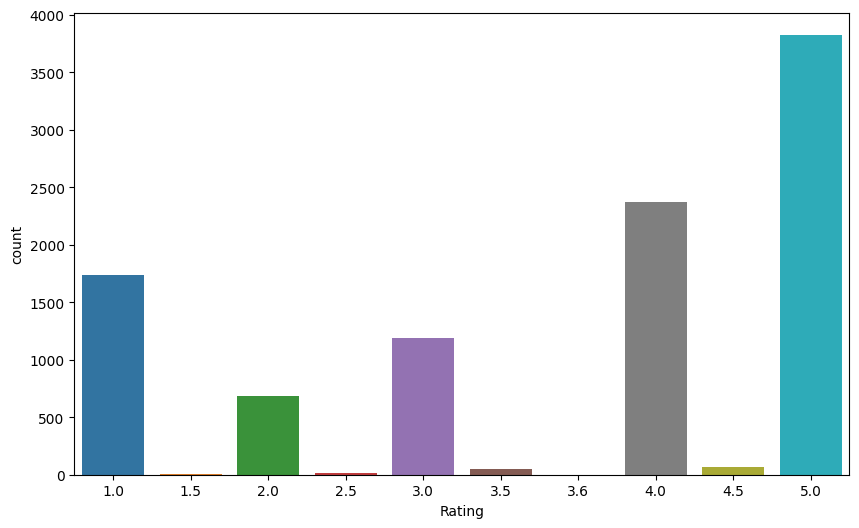

In [ ]:
sns.countplot(x = 'Rating', data = reviews_df)

We can see most people gave 5.0 Ratings.

<Axes: xlabel='Year', ylabel='count'>

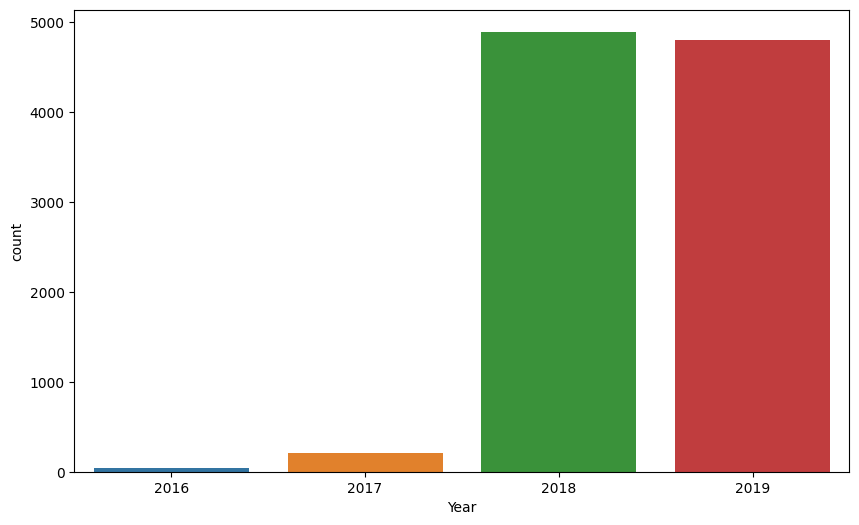

In [ ]:
sns.countplot(x = 'Year', data =reviews_df)

We can see from above plot that most people started Reviewing since 2018.


<Axes: xlabel='Month', ylabel='count'>

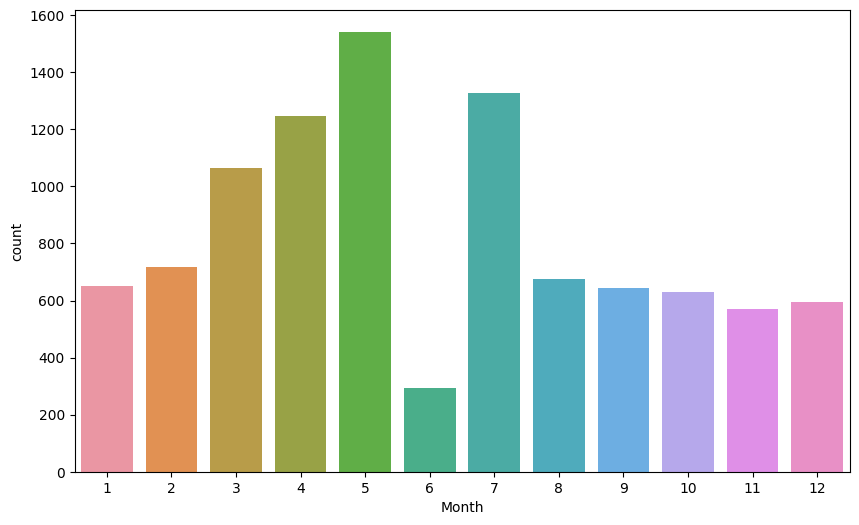

In [ ]:
sns.countplot(x = 'Month', data = reviews_df)

Most Reviews are coming during the month of May and July.

<Axes: xlabel='Hour', ylabel='count'>

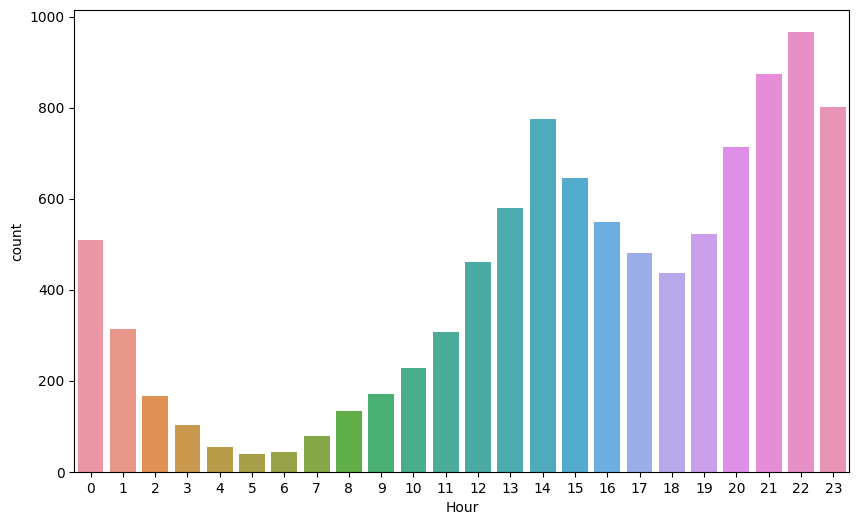

In [ ]:
sns.countplot(x = 'Hour', data = reviews_df)

Most Reviews are coming during Afternoon and at Night which is logical because it is a time of Lunch and Dinner i.e. when people usually have free time.

In [ ]:
df_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending = False).reset_index()
df_rating[:10]

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.88
1,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
3,Paradise,4.70
4,Flechazo,4.66
5,The Indi Grill,4.60
6,Zega - Sheraton Hyderabad Hotel,4.45
7,Over The Moon Brew Company,4.34
8,Beyond Flavours,4.28
9,Cascade - Radisson Hyderabad Hitec City,4.26


Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

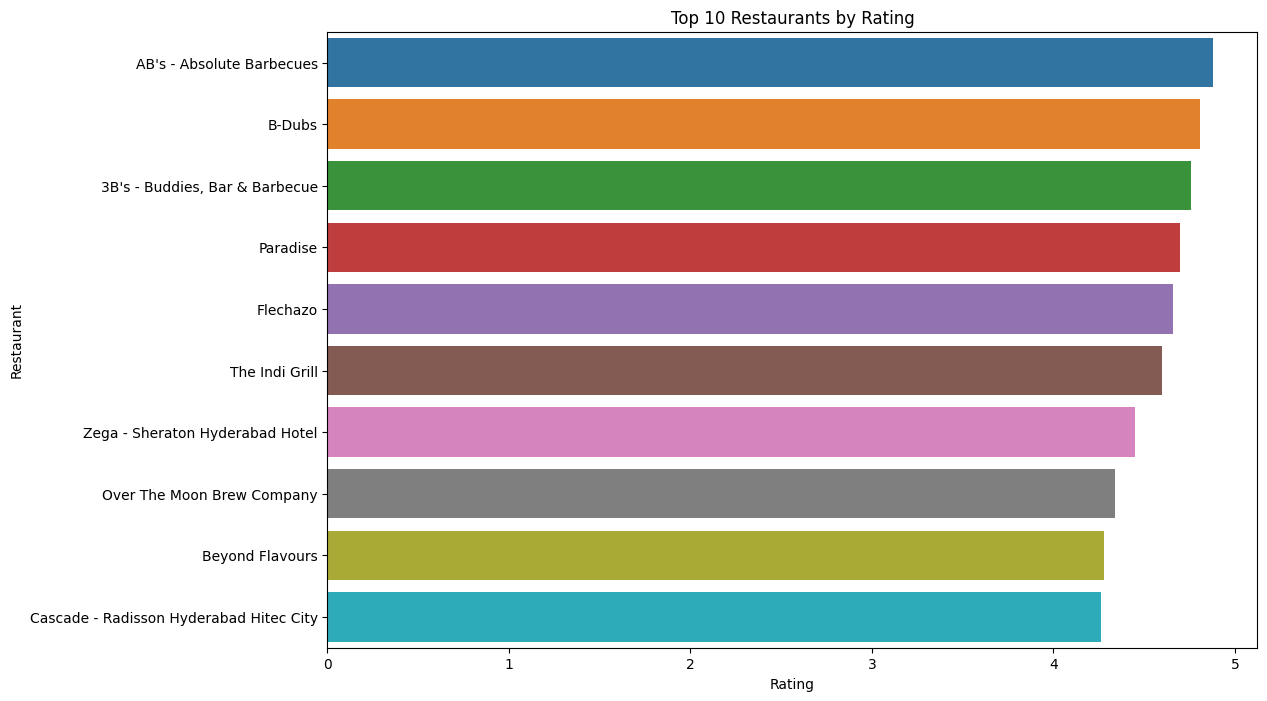

In [ ]:
fig = plt.figure(figsize=[12,8])
sns.barplot(data=df_rating[:10], x='Rating', y='Restaurant')
plt.title('Top 10 Restaurants by Rating')

In [ ]:
reviews_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


In [ ]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
df_Reviewer[:15]

,Reviewer,Reviews,Followers,Rating
0,#FOODPORN,35,5873.0,5.0
1,#chloesviews // CAH,3,1.0,5.0
2,$ign,50,55.0,4.0
3,4mybanti,7,4.0,2.0
4,@FuloriBinaChutneyKaiseBani,86,244.0,5.0
5,@Vignesh #FoodMad,20,509.0,4.0
6,@foodie.amy6 | AMNA,69,703.0,5.0
7,A K,12,2654.0,5.0
8,A K RAJEEV,1,2.0,5.0
9,A Vinod Kumar,1,1.0,1.0


Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

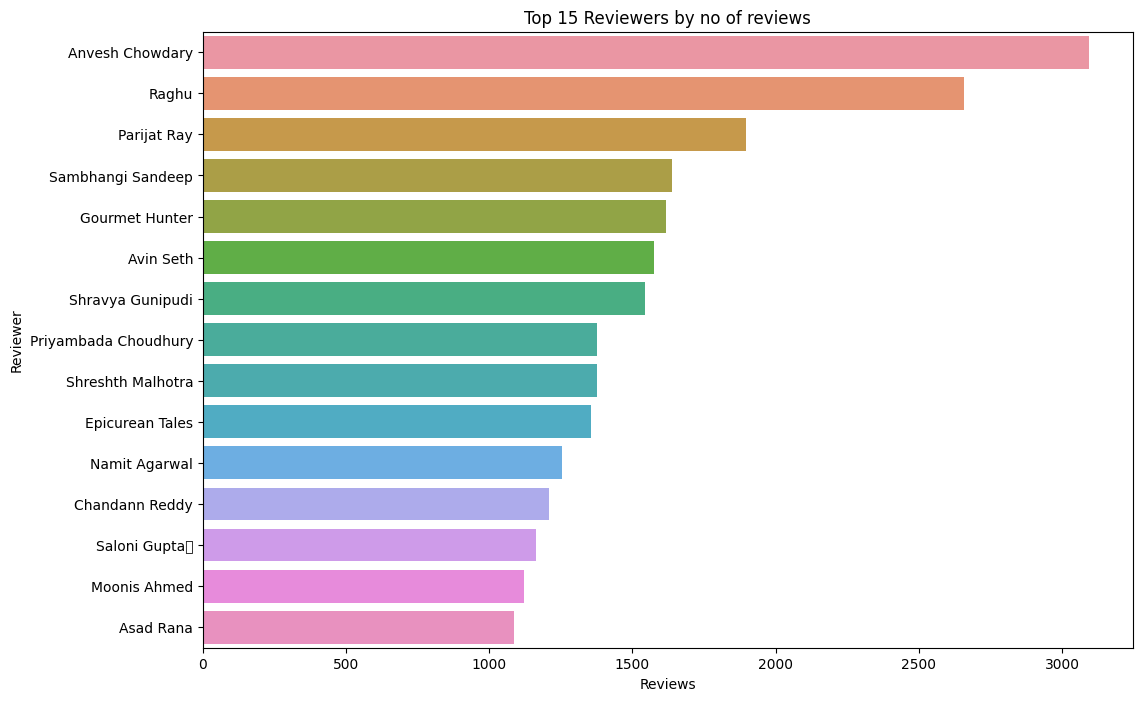

In [ ]:
fig = plt.figure(figsize=[12,8])
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values(by = 'Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Folowers')

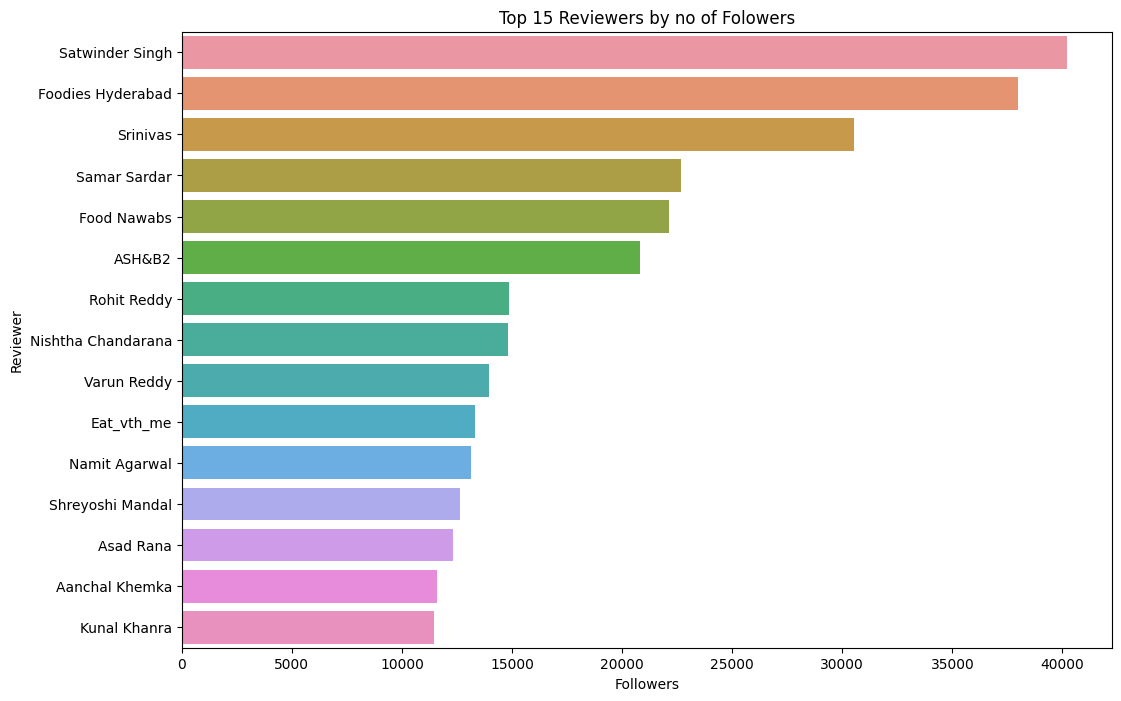

In [ ]:
fig = plt.figure(figsize=[12,8])
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values(by= 'Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Folowers')

# **Data Preprocessing**

The objective of this step is to clean noise those are less relevant to find the sentiment of Reviewer such as punctuation(.,?,” etc.), special characters(@,%,&,$, etc.), numbers(1,2,3, etc.), emojis and terms which don’t carry much weightage in context to the text.

In [ ]:
#import some liabrary for preprocessing.
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
reviews_df.head(10)

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21
5,5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,2019-05-24 15:22:00,0,1,0.0,2019,5,24,15
6,6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,2019-05-24 01:02:00,0,1,0.0,2019,5,24,1
7,7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0,1,0.0,2019,5,23,15
8,8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5.0,2019-05-22 23:12:00,0,1,1.0,2019,5,22,23
9,9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5.0,2019-05-22 22:37:00,0,1,1.0,2019,5,22,22


In [ ]:
reviews_df.Review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9950    Madhumathi Mahajan Well to start with nice cou...
9951    This place has never disappointed us.. The foo...
9952    Bad rating is mainly because of "Chicken Bone ...
9953    I personally love and prefer Chinese Food. Had...
9954    Checked in here to try some delicious chinese ...
Name: Review, Length: 9955, dtype: object

### Removing Punctuation.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    text_nopunct= ''.join([i for i in text if i not in string.punctuation])
    return text_nopunct

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_punctuation)

In [ ]:
reviews_df['Review'][0]

'The ambience was good food was quite good  had Saturday lunch  which was cost effective \nGood place for a sate brunch One can also chill with friends and or parents\nWaiter Soumen Das was really courteous and helpful'

In [ ]:
# function to remove Hashtags and Digits.
def remove_noise(tweet):
  #remove hashtags
  tweet = re.sub(r'#\w+','' , tweet)
  # remove digits
  tweet = re.sub(r'\d+',' ', tweet)
  # Normalize whitespace
  tweet = re.sub(r'\s+', ' ', tweet).strip()
  return tweet

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_noise)

## Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
#function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(stopwords)

In [ ]:
reviews_df['Review'][0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

In [ ]:
all_words = ' '.join([text for text in reviews_df['Review']])

In [ ]:
# all_words

We have Some Emojis in our data lets remove it.

In [ ]:
import re
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_emojis)

In [ ]:
all_words = ' '.join([text for text in reviews_df['Review']])

In [ ]:
#all_words

We have successfully Removed all emojis.

## **Top Words before stemming**

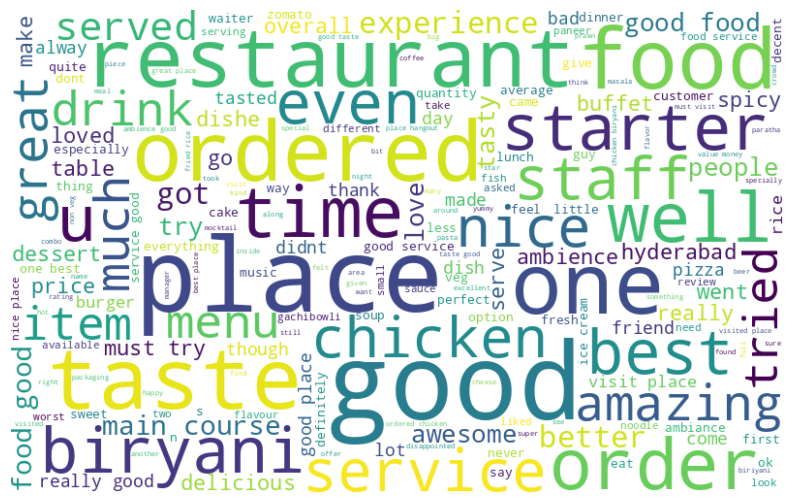

In [ ]:
# create text from all tweets
from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7007),
 ('food', 6488),
 ('place', 5663),
 ('service', 3157),
 ('chicken', 3045),
 ('taste', 2215),
 ('ordered', 2163),
 ('ambience', 2044),
 ('great', 1936),
 ('one', 1886),
 ('really', 1659),
 ('time', 1582),
 ('also', 1577),
 ('nice', 1464),
 ('like', 1451),
 ('best', 1433),
 ('biryani', 1305),
 ('staff', 1295),
 ('try', 1278),
 ('visit', 1255)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

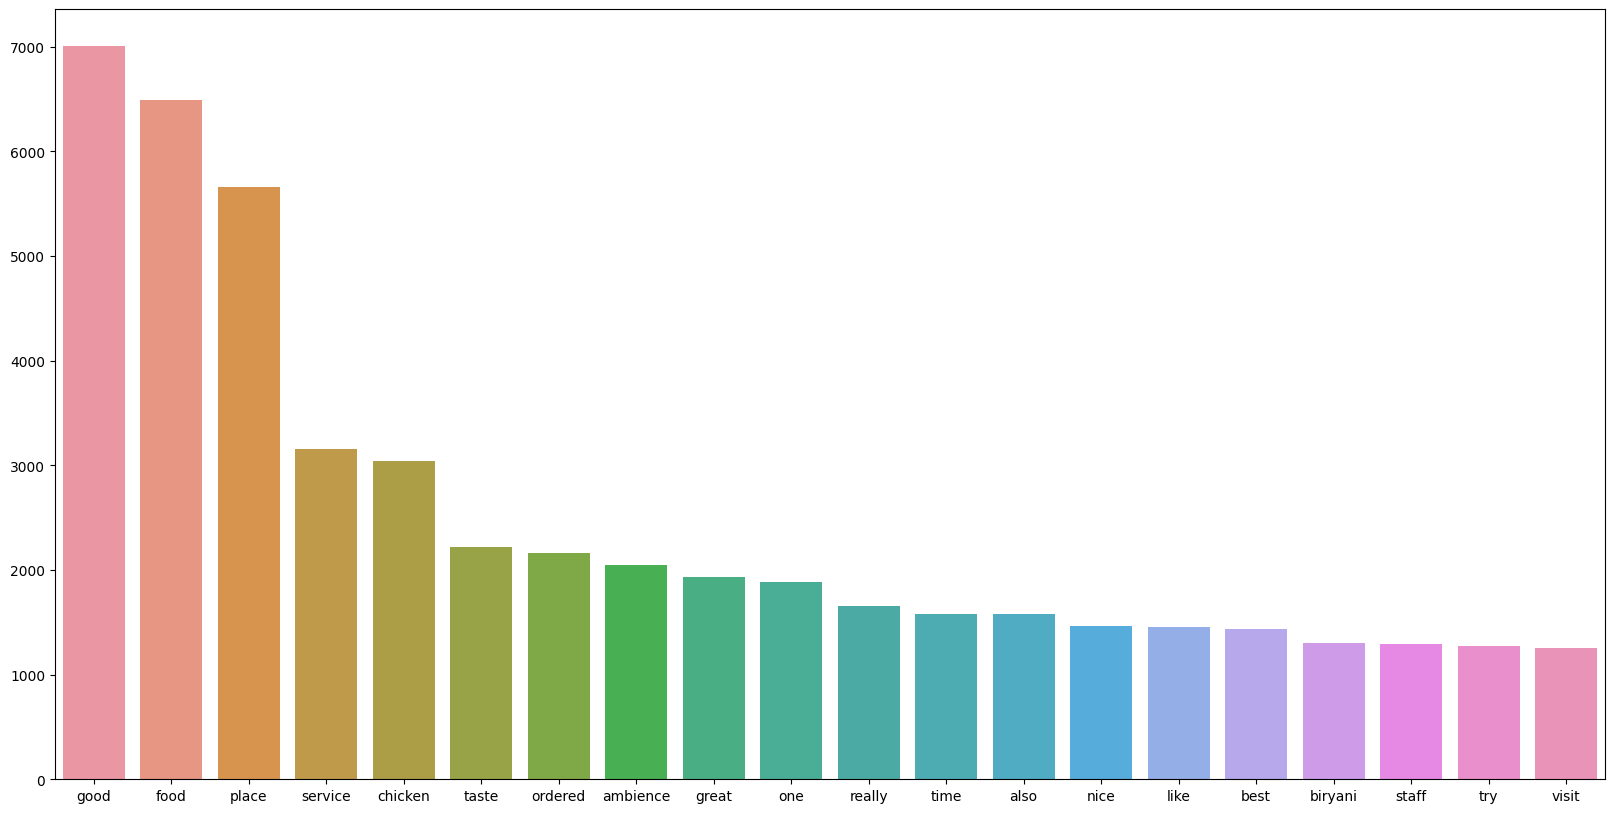

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = x , y = y)
plt.show()

These are the Most used words in our Dataset.

### **A function for stemming operation**

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(stemming)

In [ ]:
reviews_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincereti g...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,4,Beyond Flavours,Dileep,food goodw order kodi drumstick basket mutton ...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


### **Top words after stemming**

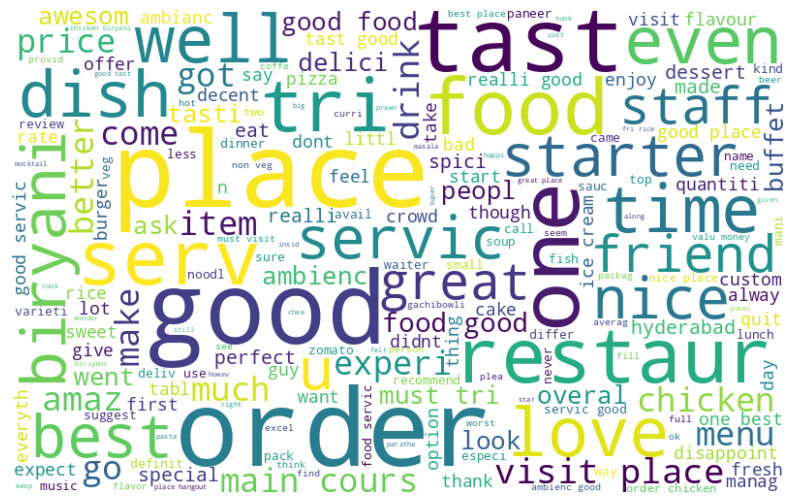

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in reviews_df['Review']])

from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7011),
 ('food', 6546),
 ('place', 6007),
 ('order', 3600),
 ('servic', 3246),
 ('chicken', 3046),
 ('tast', 2983),
 ('ambienc', 2045),
 ('time', 2041),
 ('tri', 2037),
 ('one', 1994),
 ('great', 1940),
 ('visit', 1875),
 ('like', 1816),
 ('realli', 1659),
 ('serv', 1592),
 ('also', 1577),
 ('nice', 1510),
 ('best', 1434),
 ('restaur', 1430)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

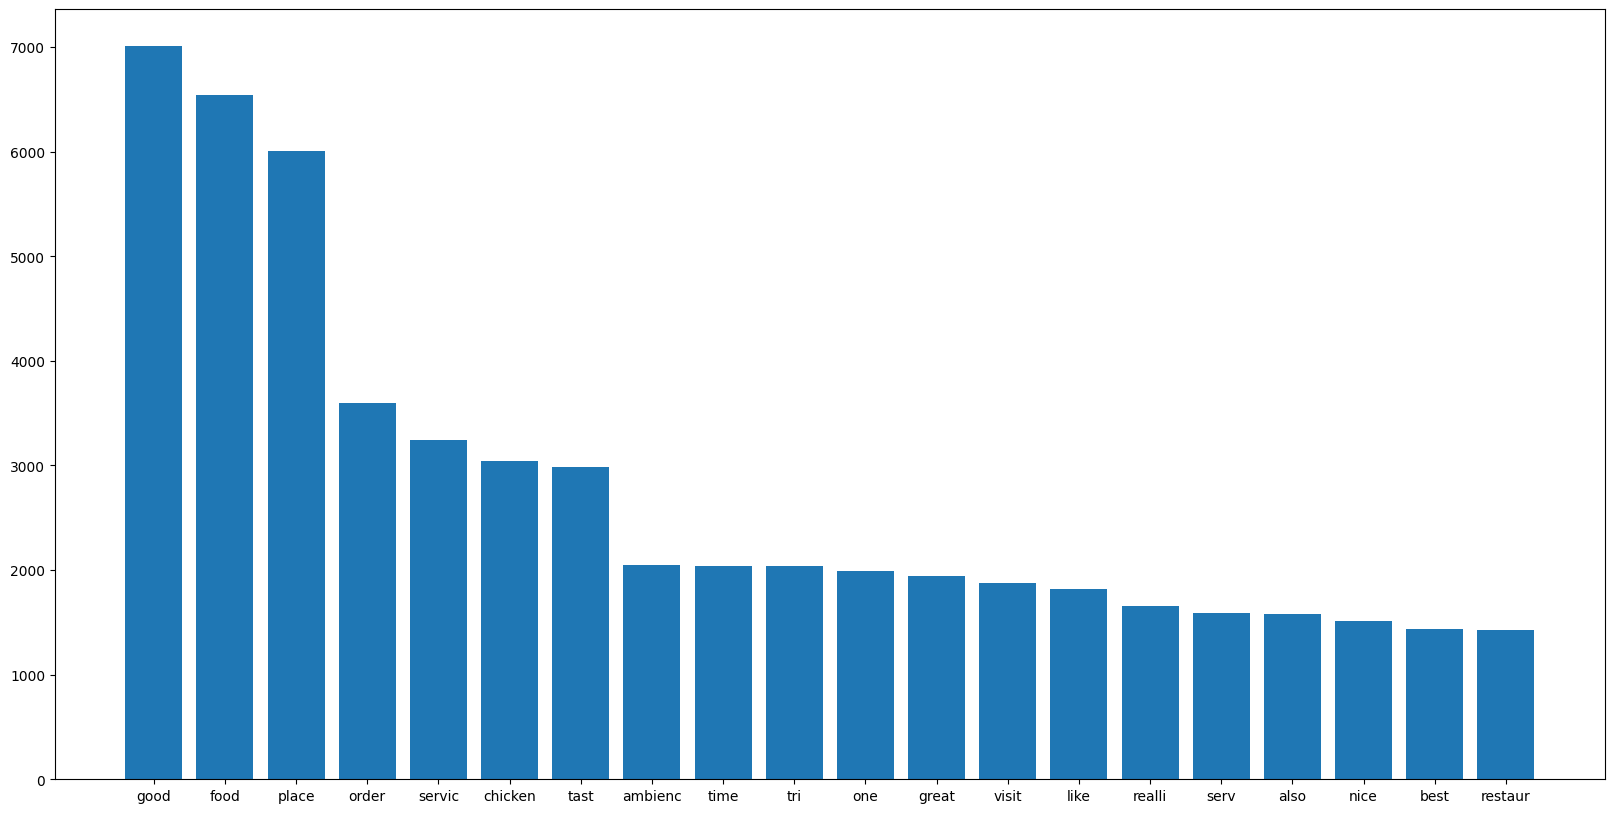

In [ ]:
plt.rcParams['figure.figsize']= (20,10)
plt.bar(x , y)
plt.show()

## **Feature Encoding**

In [ ]:
def sentiment(rating):
  if rating >=3.5:
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment

In [ ]:
reviews_df['sentiment']=reviews_df['Rating'].apply(sentiment)

In [ ]:
reviews_df['sentiment'].value_counts()

0    6316
1    3639
Name: sentiment, dtype: int64

In [ ]:
reviews_df.tail(10)

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour,sentiment
9945,9990,Chinese Pavilion,Akram Ul Haq,amaz food alway go want chine food favourit cr...,5.0,2016-06-16 13:53:00,0,3,128.0,2016,6,16,13,0
9946,9991,Chinese Pavilion,Krishna Teja Ratnakaram,never fan chine food visit chine pavilionbanja...,5.0,2016-06-15 00:50:00,0,9,54.0,2016,6,15,0,0
9947,9992,Chinese Pavilion,Sujay Garg,visit restaur friend immedi blown away qualiti...,5.0,2016-06-15 00:04:00,0,4,1.0,2016,6,15,0,0
9948,9993,Chinese Pavilion,Richard Rao,im go cut chase food excel must say honey chic...,5.0,2016-06-14 18:35:00,0,3,74.0,2016,6,14,18,0
9949,9994,Chinese Pavilion,Shiladitya Chaudhury,chine pavilion banjara hill first chine restau...,1.5,2016-06-05 10:49:00,0,6,3.0,2016,6,5,10,1
9950,9995,Chinese Pavilion,Abhishek Mahajan,madhumathi mahajan well start nice courteous s...,3.0,2016-06-05 00:08:00,0,53,54.0,2016,6,5,0,1
9951,9996,Chinese Pavilion,Sharad Agrawal,place never disappoint u food courteous staff ...,4.5,2016-06-04 22:01:00,0,2,53.0,2016,6,4,22,0
9952,9997,Chinese Pavilion,Ramandeep,bad rate main chicken bone found veg food acce...,1.5,2016-06-03 10:37:00,3,65,423.0,2016,6,3,10,1
9953,9998,Chinese Pavilion,Nayana Shanbhag,person love prefer chine food coupl time husba...,4.0,2016-05-31 17:22:00,0,13,144.0,2016,5,31,17,0
9954,9999,Chinese Pavilion,Bhargava Krishna,check tri delici chine food seen nonveg lunche...,3.5,2016-05-31 16:41:00,6,472,1302.0,2016,5,31,16,0


In [ ]:
sentiment_df = reviews_df[['Review','sentiment']]
sentiment_df.head()

,Review,sentiment
0,ambienc good food quit good saturday lunch cos...,0
1,ambienc good pleasant even servic prompt food ...,0
2,must tri great food great ambienc thnx servic ...,0
3,soumen da arun great guy behavior sincereti go...,0
4,food goodw order kodi drumstick basket mutton ...,0


In [ ]:
# Creating our Dependent and independent variable.
X = sentiment_df['Review']
Y = sentiment_df['sentiment']

In [ ]:
#importing CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Applying CountVectorizer
cv =  CountVectorizer(max_features=5000)
X= cv .fit_transform(X).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(9955, 5000)

## **Model Building**



## Sentiment analysis superviesd

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

## **Train Test Split**

In [ ]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (6968, 5000)
X_test.shape :  (2987, 5000)
y_train.shape :  (6968,)
y_test.shape :  (2987,)


# **Decision Tree**

In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

#Performance Metrics
dtree_accuracy= accuracy_score(dtree_predictions,y_test)
dtree_precision= precision_score(dtree_predictions,y_test)
dtree_recall= recall_score(dtree_predictions,y_test)

print('Performance of Decision Tree Classifier')
print('Accuracy :' , dtree_accuracy)
print('Precision :', dtree_precision)
print('Recall :', dtree_recall)

Performance of Decision Tree Classifier
Accuracy : 0.7325075326414463
Precision : 0.5302197802197802
Recall : 0.669364161849711


In [ ]:
dtree_auc_roc = roc_auc_score(dtree_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(dtree_predictions,y_test))

roc_auc_score for test set :  0.7138055493508687


In [ ]:
print('Classification Report:')
print(classification_report(dtree_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2122
           1       0.53      0.67      0.59       865

    accuracy                           0.73      2987
   macro avg       0.69      0.71      0.70      2987
weighted avg       0.76      0.73      0.74      2987



# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

#Performance Metrics
logreg_accuracy = accuracy_score(logreg_predictions,y_test)
logreg_precision = precision_score(logreg_predictions,y_test)
logreg_recall= recall_score(logreg_predictions,y_test)

print('Performance of Logistic Regression')
print('Accuracy :' ,logreg_accuracy)
print('Precision :', logreg_precision)
print('Recall :', logreg_recall)

Performance of Logistic Regression
Accuracy : 0.8704385671242049
Precision : 0.7884615384615384
Recall : 0.8466076696165191


In [ ]:
logreg_auc_roc = roc_auc_score(logreg_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(logreg_predictions,y_test))

roc_auc_score for test set :  0.8646743931838942


In [ ]:
print('Classification Report:')
print(classification_report(logreg_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1970
           1       0.79      0.85      0.82      1017

    accuracy                           0.87      2987
   macro avg       0.85      0.86      0.86      2987
weighted avg       0.87      0.87      0.87      2987



# **KNN Classifier**

In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)

print('Performance of K-nearest neighbour Classifier')
print('Accuracy :' ,knn_accuracy)
print('Precision :',knn_precision)
print('Recall :',knn_recall)

Performance of K-nearest neighbour Classifier
Accuracy : 0.7569467693337797
Precision : 0.4945054945054945
Recall : 0.7563025210084033


In [ ]:
knn_auc_roc = roc_auc_score(knn_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(knn_predictions,y_test))

roc_auc_score for test set :  0.7567258315556755


In [ ]:
print('Classification Report:')
print(classification_report(knn_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2273
           1       0.49      0.76      0.60       714

    accuracy                           0.76      2987
   macro avg       0.70      0.76      0.71      2987
weighted avg       0.81      0.76      0.77      2987



# **Random Forest Clssifier**

In [ ]:
#Random Forest Clssifier
from sklearn.ensemble import RandomForestClassifier
rcf= RandomForestClassifier()
rcf.fit(X_train, y_train)
rcf_predictions= rcf.predict(X_test)

#Performance Metrics
rcf_accuracy= accuracy_score(rcf_predictions,y_test)
rcf_precision= precision_score(rcf_predictions,y_test)
rcf_recall= recall_score(rcf_predictions,y_test)

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_accuracy)
print('Precision :',rcf_precision)
print('Recall :',rcf_recall)

Performance of Random Forest classifier
Accuracy : 0.867425510545698
Precision : 0.7289377289377289
Recall : 0.8883928571428571


In [ ]:
rcf_auc_roc = roc_auc_score(rcf_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(rcf_predictions,y_test))

roc_auc_score for test set :  0.8734168972467036


In [ ]:
print('Classification Report:')
print(classification_report(rcf_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2091
           1       0.73      0.89      0.80       896

    accuracy                           0.87      2987
   macro avg       0.84      0.87      0.85      2987
weighted avg       0.88      0.87      0.87      2987



# **XGBoost Classifier**

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier
xgbcf = XGBClassifier()
xgbcf.fit(X_train, y_train)
xgbcf_predictions= xgbcf.predict(X_test)

#Performance Metrics
xgbcf_accuracy= accuracy_score(xgbcf_predictions,y_test)
xgbcf_precision= precision_score(xgbcf_predictions,y_test)
xgbcf_recall= recall_score(xgbcf_predictions,y_test)

print('Performance of XGBoost classifier')
print('Accuracy :' ,xgbcf_accuracy)
print('Precision :', xgbcf_precision)
print('Recall :', xgbcf_recall)

Performance of XGBoost classifier
Accuracy : 0.8620689655172413
Precision : 0.7527472527472527
Recall : 0.8526970954356846


In [ ]:
xgbcf_auc_roc = roc_auc_score(xgbcf_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(xgbcf_predictions,y_test))

roc_auc_score for test set :  0.859615972334748


In [ ]:
print('Classification Report:')
print(classification_report(xgbcf_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.89      2023
           1       0.75      0.85      0.80       964

    accuracy                           0.86      2987
   macro avg       0.84      0.86      0.85      2987
weighted avg       0.87      0.86      0.86      2987



# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

## **Decision Tree**

In [ ]:
#set the parmeter
param_grid = { 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30] }

#fit the parameter
grid_dtree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_dtree_clf.fit(X_train, y_train)

# Decision Tree Classifier
dtree_cv = grid_dtree_clf.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
#Decision Tree Predictions
dtree_cv_predictions= dtree_cv.predict(X_test)

#Performance Metrics
dtree_cv_accuracy= accuracy_score(dtree_cv_predictions,y_test)
dtree_cv_precision= precision_score(dtree_cv_predictions,y_test)
dtree_cv_recall= recall_score(dtree_cv_predictions,y_test)

print('Performance of Decision Tree classifier')
print('Accuracy :' ,dtree_cv_accuracy)
print('Precision :',dtree_cv_precision)
print('Recall :',dtree_cv_recall)

Performance of Decision Tree classifier
Accuracy : 0.8034817542684968
Precision : 0.7371794871794872
Recall : 0.7285067873303167


In [ ]:
dtree_cv_auc_roc = roc_auc_score(dtree_cv_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(dtree_cv_predictions,y_test))

roc_auc_score for test set :  0.7880047220392286


In [ ]:
print('Classification Report:')
print(classification_report(dtree_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1882
           1       0.74      0.73      0.73      1105

    accuracy                           0.80      2987
   macro avg       0.79      0.79      0.79      2987
weighted avg       0.80      0.80      0.80      2987



## **Logistic Regression**

In [ ]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

#fit the parameter
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

# Logistic Regression Classifier
logreg_cv = grid_lr_clf.best_estimator_

Fitting 3 folds for each of 14 candidates, totalling 42 fits


In [ ]:
#Logistic Regression Predictions
logreg_cv_predictions= logreg_cv.predict(X_test)

#Performance Metrics
logreg_cv_accuracy= accuracy_score(logreg_cv_predictions,y_test)
logreg_cv_precision= precision_score(logreg_cv_predictions,y_test)
logreg_cv_recall= recall_score(logreg_cv_predictions,y_test)

print('Performance of Logistic Regression classifier')
print('Accuracy :' ,logreg_cv_accuracy)
print('Precision :',logreg_cv_precision)
print('Recall :',logreg_cv_recall)

Performance of Logistic Regression classifier
Accuracy : 0.8751255440241045
Precision : 0.7710622710622711
Recall : 0.8725388601036269


In [ ]:
rcf_cv_auc_roc = roc_auc_score(logreg_cv_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(logreg_cv_predictions,y_test))

roc_auc_score for test set :  0.8744494498342071


In [ ]:
print('Classification Report:')
print(classification_report(logreg_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.90      2022
           1       0.77      0.87      0.82       965

    accuracy                           0.88      2987
   macro avg       0.85      0.87      0.86      2987
weighted avg       0.88      0.88      0.88      2987



## **KNN Classifier**

In [ ]:
#set the parmeter
param_grid = { 'n_neighbors': [3, 5, 7, 9, 11] } # Number of neighbors to consider

#fit the parameter
grid_knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_knn_clf.fit(X_train, y_train)

#Random Forest Classifier
knn_cv = grid_knn_clf.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
# K Nearest Neighbors Predictions
knn_cv_predictions= knn_cv.predict(X_test)

#Performance Metrics
knn_cv_accuracy= accuracy_score(knn_cv_predictions,y_test)
knn_cv_precision= precision_score(knn_cv_predictions,y_test)
knn_cv_recall= recall_score(knn_cv_predictions,y_test)

print('Performance of KNearest Neighbors classifier')
print('Accuracy :' ,knn_cv_accuracy)
print('Precision :',knn_cv_precision)
print('Recall :',knn_cv_recall)

Performance of KNearest Neighbors classifier
Accuracy : 0.7515902243053231
Precision : 0.5064102564102564
Recall : 0.7314814814814815


In [ ]:
rcf_cv_auc_roc = roc_auc_score(knn_cv_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(knn_cv_predictions,y_test))

roc_auc_score for test set :  0.7449428922423095


In [ ]:
print('Classification Report:')
print(classification_report(knn_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2231
           1       0.51      0.73      0.60       756

    accuracy                           0.75      2987
   macro avg       0.70      0.74      0.71      2987
weighted avg       0.80      0.75      0.76      2987



## **Random Forest**

In [ ]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

#Random Forest Classifier
rcf_cv = grid_rf_clf.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
# Random Forest Predictions
rcf_cv_predictions= rcf_cv.predict(X_test)

#Performance Metrics
rcf_cv_accuracy= accuracy_score(rcf_cv_predictions,y_test)
rcf_cv_precision= precision_score(rcf_cv_predictions,y_test)
rcf_cv_recall= recall_score(rcf_cv_predictions,y_test)

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_cv_accuracy)
print('Precision :',rcf_cv_precision)
print('Recall :',rcf_cv_recall)

Performance of Random Forest classifier
Accuracy : 0.8372949447606294
Precision : 0.6016483516483516
Recall : 0.9279661016949152


In [ ]:
rcf_cv_auc_roc = roc_auc_score(rcf_cv_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(rcf_cv_predictions,y_test))

roc_auc_score for test set :  0.8685464558496515


In [ ]:
print('Classification Report:')
print(classification_report(rcf_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2279
           1       0.60      0.93      0.73       708

    accuracy                           0.84      2987
   macro avg       0.79      0.87      0.81      2987
weighted avg       0.89      0.84      0.85      2987



## **XGBoost Classifier**

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

#XGBoost Classifier
xgbcf_cv = gsearch1.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
#XGBoost Predictions
xgbcf_cv_predictions= xgbcf_cv.predict(X_test)

#Performance Metrics
xgbcf_cv_accuracy= accuracy_score(xgbcf_cv_predictions,y_test)
xgbcf_cv_precision= precision_score(xgbcf_cv_predictions,y_test)
xgbcf_cv_recall= recall_score(xgbcf_cv_predictions,y_test)

print('Performance of XGBoost classifier')
print('Accuracy :' ,xgbcf_cv_accuracy)
print('Precision :',xgbcf_cv_precision)
print('Recall :',xgbcf_cv_recall)

Performance of XGBoost classifier
Accuracy : 0.8617341814529629
Precision : 0.7738095238095238
Recall : 0.8358061325420376


In [ ]:
xgbcf_cv_auc_roc = roc_auc_score(xgbcf_cv_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(xgbcf_cv_predictions,y_test))

roc_auc_score for test set :  0.8554030662710188


In [ ]:
print('Classification Report:')
print(classification_report(xgbcf_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1976
           1       0.77      0.84      0.80      1011

    accuracy                           0.86      2987
   macro avg       0.84      0.86      0.85      2987
weighted avg       0.87      0.86      0.86      2987



# **Comparision of Performance of all Models**

In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbour',
              'Random Forest', 'XGBoost'],
    'Test accuracy': [dtree_accuracy, logreg_accuracy, knn_accuracy, rcf_cv_accuracy, xgbcf_accuracy, ],
    'Precision': [dtree_precision, logreg_precision, knn_precision, rcf_cv_precision, xgbcf_precision, ],
    'Recall': [dtree_recall, logreg_recall, knn_recall, rcf_cv_recall, xgbcf_recall, ],
    'Auc-Roc Score': [dtree_auc_roc, logreg_auc_roc, knn_auc_roc, rcf_cv_auc_roc ,xgbcf_auc_roc]})

models.sort_values(by='Test accuracy', ascending=False).reset_index()

,index,Model,Test accuracy,Precision,Recall,Auc-Roc Score
0,1,Logistic Regression,0.870439,0.788462,0.846608,0.864674
1,4,XGBoost,0.862069,0.752747,0.852697,0.859616
2,3,Random Forest,0.837295,0.601648,0.927966,0.868546
3,2,K Nearest Neighbour,0.756947,0.494505,0.756303,0.756726
4,0,Decision Tree,0.732508,0.530220,0.669364,0.713806


Observation:

We can see from above table that Logistic Regression have highest Test Accuracy and Precision. but Random Forest has highest auc-roc score.
From above observations we can say that Logistic Regression and Random Forest are our best Models.

# **Conclusion**

That's it! We reached the end of our exercise.Starting with loading the data so far we have done EDA, null values treatment, encoding of categorical columns, feature selection, and then model building.


*   For clustering, we have decided on 5 clusters after the Silhouette score plot and elbow plot where we used KMeans clustering algorithm.
*   For Sentiment Analysis  we have implemented five different models to predict the sentiment of Reviews. Logistic Regression, Random Forest Classifier, Decision Tree, K Nearest Neighbour and Xgboost Classifier.




*    Logistic Regression  and Random Forest model performed the best among them. In this way, we can explore more from various textual data and Reviews. Our models will try to predict the various sentiments correctly.







